<a href="https://colab.research.google.com/github/jazmichewcam/EDP1/blob/main/Ecuaci%C3%B3n%20de%20calor%20en%20diferencias%20progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación del calor - Diferencias progresivas



$$u_t = u_{xx}$$ $$\\  0<x<1, \hspace1cm t\geq0; \\ u(0,t)=u(1,t)=0 \\ u(x,0)=sin(\pi x).$$  

Se compara en $t=0.5$ con la solución exacta

$$u(x,t)=e^{(-\pi^2 t)} sin(\pi x).$$

In [1]:
import numpy as np, math, pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# PARÁMETROS FÍSICOS Y GEOMÉTRICOS DEL PROBLEMA
# =============================================================================
L = 1.0           # Longitud del dominio espacial
pi = math.pi      # Constante π para cálculos

# =============================================================================
# CONDICIÓN INICIAL: Distribución de temperatura en t=0
# =============================================================================
def u0(x):
    return np.sin(pi*x)  # Perfil sinusoidal inicial

# =============================================================================
# SOLUCIÓN EXACTA: Solución analítica de la ecuación de calor
# =============================================================================
def u_exact(x, t):
    return np.exp(-pi**2 * t) * np.sin(pi*x)  # Decaimiento exponencial del modo fundamental

# =============================================================================
# MÉTODO NUMÉRICO: Esquema FTCS (Forward Time Centered Space)
# =============================================================================
def ftcs_heat(h, k, t_final):


    # DISCRETIZACIÓN ESPACIAL: Creación de la malla computacional
    x = np.arange(0.0, L + 1e-12, h)  # Puntos espaciales de 0 a L

    # PARÁMETRO DE ESTABILIDAD: Relación crítica para convergencia
    r = k / h**2  # Debe ser ≤ 0.5 para estabilidad numérica

    # INICIALIZACIÓN: Aplicar condiciones iniciales y de frontera
    w = u0(x)      # Condición inicial en toda la malla
    w[0] = 0.0     # Condición de frontera Dirichlet en x=0
    w[-1] = 0.0    # Condición de frontera Dirichlet en x=L

    # ITERACIÓN TEMPORAL: Avance paso a paso en el tiempo
    Nt = int(round(t_final / k))  # Número total de pasos temporales

    for _ in range(Nt):
        w_new = w.copy()  # Copia del estado actual para actualización

        # APLICACIÓN DEL ESQUEMA FTCS: Actualización de puntos internos
        # w_new[i] = w[i] + r * (w[i+1] - 2*w[i] + w[i-1])
        w_new[1:-1] = w[1:-1] + r * (w[2:] - 2*w[1:-1] + w[:-2])

        w = w_new  # Actualizar el estado para siguiente iteración

    return x, w, r, Nt  # Retornar resultados y parámetros computacionales


In [2]:
# =============================================================================
# CONFIGURACIÓN DE PARÁMETROS DE SIMULACIÓN
# =============================================================================
t_final = 0.5    # Tiempo final de simulación
h = 0.1          # Tamaño del paso espacial (discretización en x)

# =============================================================================
# FUNCIÓN DE COMPARACIÓN: Solución exacta vs numérica
# =============================================================================
def make_df(h, k):


    # EJECUCIÓN DEL MÉTODO NUMÉRICO
    x, w, r, Nt = ftcs_heat(h, k, t_final)

    # CÁLCULO DE LA SOLUCIÓN ANALÍTICA EXACTA
    uex = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x)

    # CONSTRUCCIÓN DEL DATAFRAME COMPARATIVO
    df_comparativo = pd.DataFrame({
        'x_i': x,                                   # Puntos de la malla espacial
        'u(x_i,0.5)': np.round(uex, 8),            # Solución exacta (8 decimales)
        f'w_i,{Nt} (k={k})': np.round(w, 8),       # Solución numérica con info de parámetros
        f'u-w (k={k})': uex - w                    # Error absoluto: exacta - numérica
    })

    return df_comparativo, r, Nt

# =============================================================================
# CASO ESTABLE: Parámetros que cumplen condición de estabilidad
# =============================================================================
# k = 0.0005, h = 0.1 → r = 0.05 < 0.5 (ESTABLE)
df_stable, r1, Nt1 = make_df(0.1, 0.0005)

# =============================================================================
# CASO INESTABLE: Parámetros que violan condición de estabilidad
# =============================================================================
# k = 0.01, h = 0.1 → r = 1.0 > 0.5 (INESTABLE - puede diverger)
df_unstable, r2, Nt2 = make_df(0.1, 0.01)

# =============================================================================
# VISUALIZACIÓN DE RESULTADOS
# =============================================================================
# Muestra primeras filas de cada caso y parámetros clave
print("=== CASO ESTABLE ===")
print(f"Parámetro r: {r1} (debe ser ≤ 0.5)")
print(f"Pasos temporales: {Nt1}")
print(df_stable.head())

print("\n=== CASO INESTABLE ===")
print(f"Parámetro r: {r2} (VIOLA condición de estabilidad)")
print(f"Pasos temporales: {Nt2}")
print(df_unstable.head())

# =============================================================================
# ANÁLISIS DE RESULTADOS:
# - df_stable: Error pequeño y controlado (solución confiable)
# - df_unstable: Error grande, posible oscilación/divergencia (no confiable)
# - r1 = 0.05: Cumple condición CFL → esquema estable
# - r2 = 1.0: Viola condición CFL → esquema inestable
# =============================================================================

=== CASO ESTABLE ===
Parámetro r: 0.04999999999999999 (debe ser ≤ 0.5)
Pasos temporales: 1000
   x_i  u(x_i,0.5)  w_i,1000 (k=0.0005)  u-w (k=0.0005)
0  0.0    0.000000             0.000000        0.000000
1  0.1    0.002222             0.002287       -0.000064
2  0.2    0.004227             0.004349       -0.000122
3  0.3    0.005818             0.005986       -0.000168
4  0.4    0.006840             0.007037       -0.000197

=== CASO INESTABLE ===
Parámetro r: 0.9999999999999998 (VIOLA condición de estabilidad)
Pasos temporales: 50
   x_i  u(x_i,0.5)  w_i,50 (k=0.01)   u-w (k=0.01)
0  0.0    0.000000         0.000000       0.000000
1  0.1    0.002222    -30266.270026   30266.272248
2  0.2    0.004227     60588.054981  -60588.050754
3  0.3    0.005818    -89862.842345   89862.848163
4  0.4    0.006840    115225.537917 -115225.531077


In [ ]:
df_stable

,x_i,"u(x_i,0.5)","w_i,1000 (k=0.0005)",u-w (k=0.0005)
0,0.0,0.000000,0.000000,0.000000e+00
1,0.1,0.002222,0.002287,-6.410661e-05
2,0.2,0.004227,0.004349,-1.219380e-04
3,0.3,0.005818,0.005986,-1.678333e-04
4,0.4,0.006840,0.007037,-1.972999e-04
5,0.5,0.007192,0.007399,-2.074533e-04
6,0.6,0.006840,0.007037,-1.972999e-04
7,0.7,0.005818,0.005986,-1.678333e-04
8,0.8,0.004227,0.004349,-1.219380e-04
9,0.9,0.002222,0.002287,-6.410661e-05


In [ ]:
df_unstable

,x_i,"u(x_i,0.5)","w_i,50 (k=0.01)",u-w (k=0.01)
0,0.0,0.000000,0.000000,0.000000e+00
1,0.1,0.002222,-30266.270026,3.026627e+04
2,0.2,0.004227,60588.054981,-6.058805e+04
3,0.3,0.005818,-89862.842345,8.986285e+04
4,0.4,0.006840,115225.537917,-1.152255e+05
5,0.5,0.007192,-132328.392814,1.323284e+05
6,0.6,0.006840,136478.815915,-1.364788e+05
7,0.7,0.005818,-124251.368517,1.242514e+05
8,0.8,0.004227,94976.581153,-9.497658e+04
9,0.9,0.002222,-51519.548023,5.151955e+04


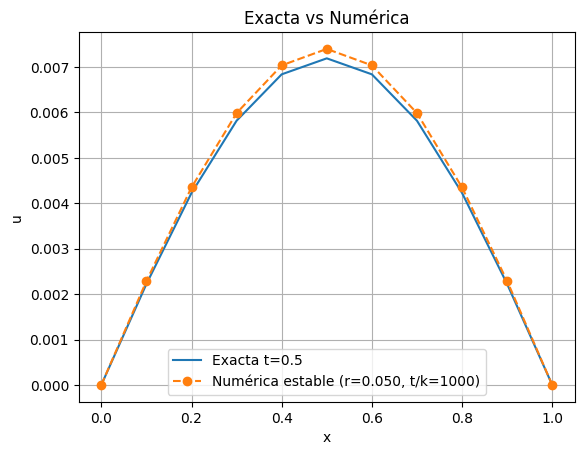

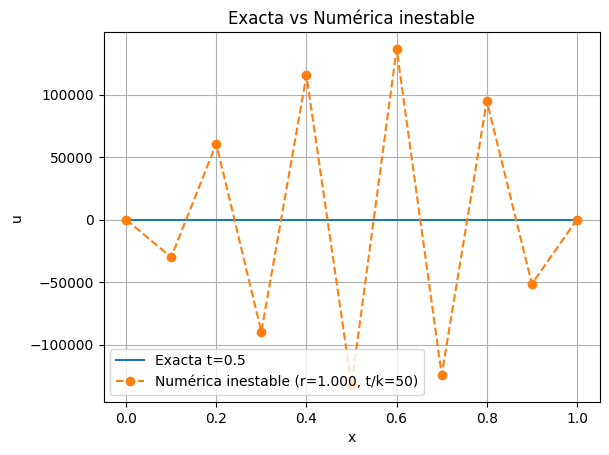

In [ ]:
x=df_stable['x_i'].values
plt.figure(); plt.plot(x,df_stable['u(x_i,0.5)'].values,label='Exacta t=0.5')
plt.plot(x,df_stable.iloc[:,2].values,marker='o',linestyle='--',label=f'Numérica estable (r={r1:.3f}, t/k={Nt1})')
plt.xlabel('x'); plt.ylabel('u'); plt.title('Exacta vs Numérica'); plt.grid(True); plt.legend(); plt.show()
x=df_unstable['x_i'].values
plt.figure(); plt.plot(x,df_unstable['u(x_i,0.5)'].values,label='Exacta t=0.5')
plt.plot(x,df_unstable.iloc[:,2].values,marker='o',linestyle='--',label=f'Numérica inestable (r={r2:.3f}, t/k={Nt2})')
plt.xlabel('x'); plt.ylabel('u'); plt.title('Exacta vs Numérica inestable'); plt.grid(True); plt.legend(); plt.show()


### Importancia de $h$ y $k$
El parámetro $r=\frac{k}{h^2}$ controla la estabilidad de la solución Analítica. Con $h=0.1, h^2=0.01$. Si $k=0.0005, r=0.05 ≤ \frac{1}{2} ,$ entonces es estable y hay errores pequeños. Si $k=0.01, r=1 > \frac{1}{2} $ entonces es inestable y los valores explotan, como se observa en las tablas y gráficas.